# **Sentiment Analysis of IMDB Movie Reviews with TF-IDF**

https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

**Importing the dataset**

In [3]:
dataSet = pd.read_csv('/content/IMDB Dataset.csv')

dataSet

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
dataSet['sentiment'].replace('positive', 1, inplace=True)
dataSet['sentiment'].replace('negative', 0, inplace=True)
dataSet

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [43]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 781.4+ KB


**Importing NLTK Library**

In [5]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
n =  dataSet.shape[0]
corpus = []
ps = PorterStemmer()

for i in range(n):
    text = re.sub('[^a-zA-Z]', ' ', dataSet['review'][i].lower())
    text = text.split()  # Spliting text into words
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Removing stopwords & # stemming
    text = ' '.join(text)  #Joining text
    corpus.append(text)

In [21]:
X = corpus
y = dataSet['sentiment'].values

**Splitting the dataset into the Training set and Test set**

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Features Extraction**

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=10000, ngram_range=(1,2))
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [24]:
X_train.shape

(40000, 10000)

**Training and Evaluating the Model**

In [35]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('Precision:', precision_score(y_test, y_pred), sep='\t')
  print('Recall:', recall_score(y_test, y_pred), sep='\t\t')
  print('F1:', f1_score(y_test, y_pred), sep='\t\t')
  print('\n')

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
  plt.show()

##Training The Model Using BernoulliNB

In [27]:
acc = {}

Accuracy:	0.8614
Precision:	0.8508135659674574
Recall:		0.8741188318227593
F1:		0.8623087621696801




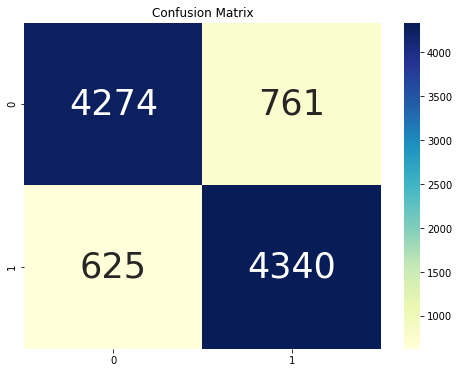

In [36]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['BernoulliNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using ComplementNB

Accuracy:	0.863
Precision:	0.8510056629564539
Recall:		0.8777442094662639
F1:		0.8641681538766608




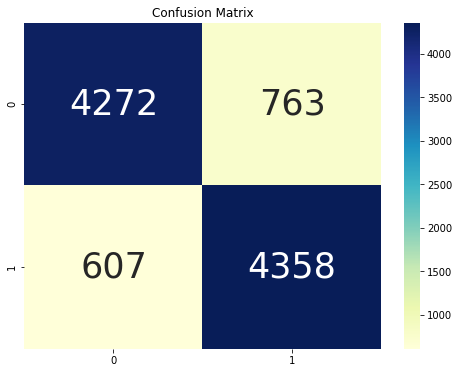

In [37]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['ComplementNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using MultinomialNB

Accuracy:	0.8637
Precision:	0.8512090483619345
Recall:		0.879154078549849
F1:		0.8649559100366591




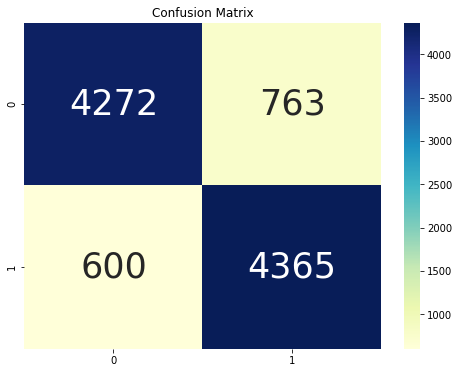

In [38]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['MultinomialNB'] = accuracy_score(y_test, y_pred)

## Training The Model Using LogisticRegression

Accuracy:	0.8962
Precision:	0.891213389121339
Recall:		0.9009063444108761
F1:		0.896033653846154




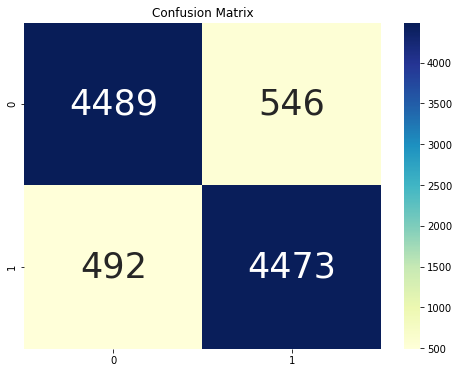

In [39]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C=2.0, random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['LogisticRegression'] = accuracy_score(y_test, y_pred)

##Training The Model Using LinearSVC

Accuracy:	0.8957
Precision:	0.8886246531906461
Recall:		0.9031218529707956
F1:		0.8958146039356708




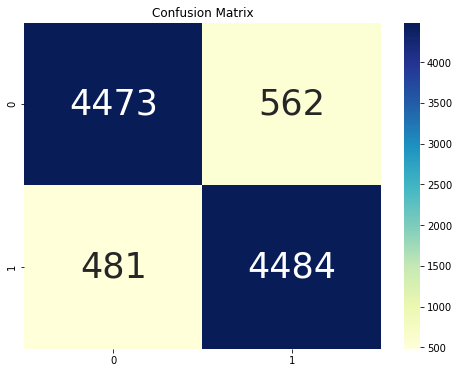

In [40]:
from sklearn.svm import LinearSVC

model = LinearSVC(C=0.2, random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['LinearSVC'] = accuracy_score(y_test, y_pred)

## Training The Model Using SGDClassifier

Accuracy:	0.8907
Precision:	0.8738895326380842
Recall:		0.9113796576032226
F1:		0.8922409543527556




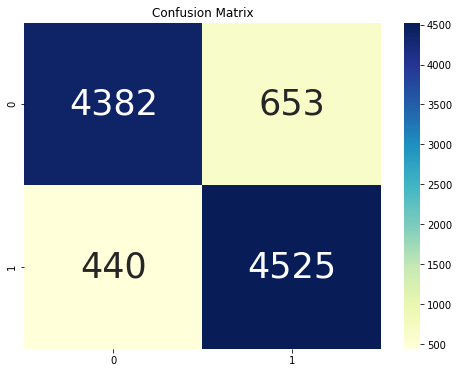

In [41]:
from sklearn.linear_model import SGDClassifier

model = SGDClassifier(random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['SGDClassifier'] = accuracy_score(y_test, y_pred)

**Summary**

In [42]:
pd.DataFrame(data = acc.values(),
             index = acc.keys(),
             columns = ['Accuracy']).sort_values(ascending = False, by = ['Accuracy'])

,Accuracy
LogisticRegression,0.8962
LinearSVC,0.8957
SGDClassifier,0.8907
MultinomialNB,0.8637
ComplementNB,0.8630
BernoulliNB,0.8614
